In [2]:
import sys; sys.path.append('..')
from feature_extraction import bow_occurrences, bow_tfidf, bow_tfidf_df
from preprocess_tweets import read_annotated_tweets, clean_tweets
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import os
from numpy import mean, std
from sklearn import metrics
import matplotlib.pyplot as plt

In [9]:
df = read_annotated_tweets(os.path.abspath('../data/classified/england_italy_tweets_classified1.csv'))
clean_tweets(df)

labels = df['label'].to_list()

positives = list(filter(lambda x: str(x) == 'Positive', labels))
negatives = list(filter(lambda x: str(x) == 'Negative', labels))
neutrals = list(filter(lambda x: str(x) == 'Neutral', labels))

print(len(positives))
print(len(negatives))
print(len(neutrals))



69
92
137


In [4]:


X_train, X_test, Y_train, Y_test = train_test_split(bow_tfidf(  df['tweet_text'], (1,2)), 
                                                                df['label'], test_size=0.2, 
                                                                random_state=6
                                                    )

In [4]:
""" test = bow_tfidf_df(df['tweet_text'], (1,1))
#print(test)

# Open a file with access mode 'a'
with open("./test.txt", "a") as file_object:
    file_object.seek(0)
    file_object.truncate()

    for column in test.columns:
        file_object.write(column + '\n')
 """

' test = bow_tfidf_df(df[\'tweet_text\'], (1,1))\n#print(test)\n\n# Open a file with access mode \'a\'\nwith open("./test.txt", "a") as file_object:\n    file_object.seek(0)\n    file_object.truncate()\n\n    for column in test.columns:\n        file_object.write(column + \'\n\')\n '

In [5]:
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

mb_model = MultinomialNB()

scores = cross_val_score(mb_model, X_train, Y_train, cv=rs)

print(scores)
print(mean(scores))
print(std(scores))

[0.52083333 0.52083333 0.47916667 0.5625     0.5625     0.47916667
 0.52083333 0.45833333 0.3125     0.47916667]
0.48958333333333337
0.06798820363366967


In [6]:
mb_model = MultinomialNB()

mb_model.fit(X_train, Y_train)

predicted = mb_model.predict(X_test)
print(predicted)

acc_score = metrics.accuracy_score(predicted, Y_test)
prec_score = metrics.precision_score(predicted, Y_test, average='macro')
rec_score = metrics.recall_score(predicted, Y_test, average='macro')
f1_score = metrics.f1_score(predicted, Y_test, average='macro')

print(acc_score)
print(prec_score)
print(rec_score)
print(f1_score)

['Neutral' 'Neutral' 'Neutral' 'Negative' 'Neutral' 'Positive' 'Neutral'
 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Negative'
 'Neutral' 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral']
0.6
0.4702380952380952
0.7886792452830189
0.4553888066887432


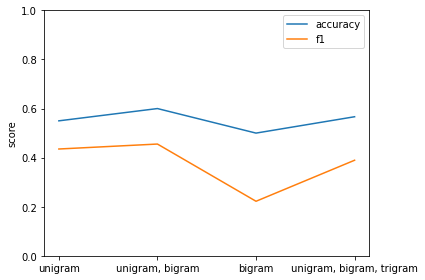

In [8]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (1,1)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (1,2)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )

X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (2,2)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )

X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(bow_tfidf(
                                                                    df['tweet_text'], (1,3)), 
                                                                    df['label'], test_size=0.2, 
                                                                    random_state=6
                                                                    )


mb_model_1 = MultinomialNB()
mb_model_1.fit(X_train_1, Y_train_1)
predicted_1 = mb_model_1.predict(X_test_1)

mb_model_2 = MultinomialNB()
mb_model_2.fit(X_train_2, Y_train_2)
predicted_2 = mb_model_2.predict(X_test_2)

mb_model_3 = MultinomialNB()
mb_model_3.fit(X_train_3, Y_train_3)
predicted_3 = mb_model_3.predict(X_test_3)

mb_model_4 = MultinomialNB()
mb_model_4.fit(X_train_4, Y_train_4)
predicted_4 = mb_model_4.predict(X_test_4)

acc_score_1 = metrics.accuracy_score(predicted_1, Y_test_1)
acc_score_2 = metrics.accuracy_score(predicted_2, Y_test_2)
acc_score_3 = metrics.accuracy_score(predicted_3, Y_test_3)
acc_score_4 = metrics.accuracy_score(predicted_4, Y_test_4)

f1_score_1 = metrics.f1_score(predicted_1, Y_test_1, average='macro')
f1_score_2 = metrics.f1_score(predicted_2, Y_test_2, average='macro')
f1_score_3 = metrics.f1_score(predicted_3, Y_test_3, average='macro')
f1_score_4 = metrics.f1_score(predicted_4, Y_test_4, average='macro')

scores = [acc_score_1, acc_score_2, acc_score_3, acc_score_4]
f1_socres = [f1_score_1, f1_score_2, f1_score_3, f1_score_4]
labels = ['unigram', 'unigram, bigram', 'bigram', 'unigram, bigram, trigram']

plt.plot(labels,scores, label='accuracy')
plt.plot(labels,f1_socres, label='f1')
plt.ylabel('score')
plt.ylim((0,1))
plt.tight_layout()
plt.legend()
plt.savefig("../figs/mnb_ngrams_compare.png")
plt.show()